In [1]:
from xsequence.lattice import Lattice
from xsequence.conversion_utils import conv_utils

Lattices can be imported from different sources. Currently only limited to FCC-ee lattice without complicated Solenoid IR descriptions.

Different examples:
 - From cpymad instance
 - From MAD-X sequence file
 - From SAD using built in SAD2MAD converter (tilted Solenoid)
 - From pyAT


In [2]:
# Import from cpymad instance
madx_lattice = conv_utils.create_cpymad_from_file("FCCee_h.seq", energy=120)
lat = Lattice.from_cpymad(madx_lattice, 'l000013')

# Import from madx sequence file (through cpymad)
lat_mad = Lattice.from_madx_seqfile("FCCee_h.seq", 'l000013', energy=120)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:06:46      +
  ++++++++++++++++++++++++++++++++++++++++++++

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:06:55      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [3]:
# Import from sad sequence file
lat_sad = Lattice.from_sad("FCCee_h.sad", 'ring', energy=120)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:07:04      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [4]:
# Import from pyat instance
pyat_lattice = conv_utils.create_pyat_from_file("FCCee_h.mat")
lat = Lattice.from_pyat(pyat_lattice)

A lattice can also be created from scratch in Python

In [5]:
import xsequence.elements as xe

# Create elements
q1 = xe.Quadrupole('q1', length=1, k1=0.2, location=1)
q2 = xe.Quadrupole('q2', length=1, k1=-0.2, location=3)
q3 = xe.Quadrupole('q3', length=1, k1=0.2, location=5)

element_dict = {'q1':q1, 'q2':q2, 'q3':q3}
lat = Lattice('lat_name', element_dict, key='sequence')

# Create elements
d0 = xe.Drift('d0', length=1)
q1 = xe.Quadrupole('q1', length=1, k1=0.2)
d1 = xe.Drift('d1', length=1)
q2 = xe.Quadrupole('q2', length=1, k1=-0.2)
d2 = xe.Drift('d1', length=1)
q3 = xe.Quadrupole('q3', length=1, k1=0.2)

element_dict = {'d0':d0, 'q1':q1, 'd1':d1, 
                'q2':q2, 'd2':d2, 'q3':q3}
lat = Lattice('lat_name', element_dict, key='line')

A Lattice() instance contains two representations of the lattice:

sequence: List of elements without drifts, based on positions

line: List of elements with explicit drifts

In [30]:
# Import from sad sequence file
lat = Lattice.from_madx_seqfile("FCCee_h.seq", 'l000013', energy=120)

print(lat.sequence)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:11:48      +
  ++++++++++++++++++++++++++++++++++++++++++++
['l000013$start', 'ip.1', 'qc1l1.1', 'qc1r2.1', 'qc1r3.1', 'qc2r1.1', 'qc2r2.1', 'pqc2re.1', 'qt1.1', 'qc3.1', 'qc4.1', 'bc1.1', 'qc5.1', 'bc2.1', 'qc6.1', 'bc3.1', 'qc7.1', 'sy1r.1', 'sy1r.2', 'bc4.1', 'qy2.1', 'bc5.1', 'qy1.1', 'bc6.1', 'qy2.2', 'bc7.1', 'sy2r.1', 'sy2r.2', 'qa1.1', 'qa2.1', 'qa3.1', 'qa4.1', 'qa5.1', 'qa6.1', 'bs1.1', 'qs1.1', 'bs2.1', 'qs2.1', 'bs3.1', 'qs3.1', 'fg.1', 'sf1.1', 'sf1.2', 'qfg2.1', 'bg1.1', 'qdg1.1', 'bg1.2', 'qfg2.2', 'bg1.3', 'qdg1.2', 'bg1.4', 'sf1.3', 'sf1.4', 'qfg2.3', 'bg1.5', 'sd1.1', 'sd1.2', 'qdg1.3', 'bg1.6', 'qfg2.4', 'bg1.7', 'qdg1.4', 'bg1.8', 'qfg2.5', 'bg1.9', 'sd1.3', 'sd1.4', 'qdg1.5', 'bg1.10', 'fg.2', 'sf2.1', 'sf2.2', 'qfg2.6', 'bg1.11', 'qdg1.6', 'bg1.

In [7]:
print(lat.line)

['ring$start', 'ip.1', 'drift_0', 'qc1l1.1', 'drift_1', 'qc1r2.1', 'drift_2', 'qc1r3.1', 'drift_3', 'qc2r1.1', 'drift_4', 'qc2r2.1', 'pqc2re.1', 'drift_5', 'qt1.1', 'drift_6', 'qc3.1', 'drift_7', 'qc4.1', 'drift_8', 'bc1.1', 'drift_9', 'qc5.1', 'drift_10', 'bc2.1', 'drift_11', 'qc6.1', 'drift_12', 'bc3.1', 'drift_13', 'qc7.1', 'drift_14', 'sy1r.1', 'sy1r.2', 'drift_15', 'bc4.1', 'drift_16', 'qy2.1', 'drift_17', 'bc5.1', 'drift_18', 'qy1.1', 'drift_19', 'bc6.1', 'drift_20', 'qy2.2', 'drift_21', 'bc7.1', 'drift_22', 'sy2r.1', 'sy2r.2', 'drift_23', 'qa1.1', 'drift_24', 'qa2.1', 'drift_25', 'qa3.1', 'drift_26', 'qa4.1', 'drift_27', 'qa5.1', 'drift_28', 'qa6.1', 'drift_29', 'bs1.1', 'drift_30', 'qs1.1', 'drift_31', 'bs2.1', 'drift_32', 'qs2.1', 'drift_33', 'bs3.1', 'drift_34', 'qs3.1', 'drift_35', 'fg.1', 'drift_36', 'sf1.1', 'drift_37', 'sf1.2', 'drift_38', 'qfg2.1', 'drift_39', 'bg1.1', 'drift_40', 'qdg1.1', 'drift_41', 'bg1.2', 'drift_42', 'qfg2.2', 'drift_43', 'bg1.3', 'drift_44', 'qdg1

Some basic functionalities and manipulations can be done

In [8]:
# Get elements of specific type
quad_sext = lat.sequence.get_class(['Quadrupole', 'Sextupole'])
print(quad_sext)

['qc1l1.1', 'qc1r2.1', 'qc1r3.1', 'qc2r1.1', 'qc2r2.1', 'qt1.1', 'qc3.1', 'qc4.1', 'qc5.1', 'qc6.1', 'qc7.1', 'sy1r.1', 'sy1r.2', 'qy2.1', 'qy1.1', 'qy2.2', 'sy2r.1', 'sy2r.2', 'qa1.1', 'qa2.1', 'qa3.1', 'qa4.1', 'qa5.1', 'qa6.1', 'qs1.1', 'qs2.1', 'qs3.1', 'sf1.1', 'sf1.2', 'qfg2.1', 'qdg1.1', 'qfg2.2', 'qdg1.2', 'sf1.3', 'sf1.4', 'qfg2.3', 'sd1.1', 'sd1.2', 'qdg1.3', 'qfg2.4', 'qdg1.4', 'qfg2.5', 'sd1.3', 'sd1.4', 'qdg1.5', 'sf2.1', 'sf2.2', 'qfg2.6', 'qdg1.6', 'qfg2.7', 'qdg1.7', 'sf2.3', 'sf2.4', 'qfg2.8', 'sd2.1', 'sd2.2', 'qdg1.8', 'qfg2.9', 'qdg1.9', 'qfg2.10', 'sd2.3', 'sd2.4', 'qg1.1', 'qg2.1', 'qg3.1', 'qg4.1', 'qg5.1', 'qg6.1', 'qg7.1', 'qg8.1', 'qg9.1', 'sd3.1', 'sd3.2', 'qd3.1', 'qf4.1', 'qd3.2', 'qf4.2', 'sd3.3', 'sd3.4', 'qd3.3', 'sf3.1', 'sf3.2', 'qf4.3', 'qd3.4', 'qf4.4', 'qd3.5', 'sf3.3', 'sf3.4', 'qf4.5', 'sd4.1', 'sd4.2', 'qd3.6', 'qf4.6', 'qd3.7', 'qf4.7', 'sd4.3', 'sd4.4', 'qd3.8', 'sf4.1', 'sf4.2', 'qf4.8', 'qd3.9', 'qf4.9', 'qd3.10', 'sf4.3', 'sf4.4', 'qf4.10', 

In [9]:
# Find element by name
print(lat.sequence['bg6.1'])

RectangularBend(bg6.1, _chord_length=14.771766983402289, _rbend_e1=-0.0, _rbend_e2=-0.0, angle=-0.001228093107925068, e1=0.000614046553962534, e2=0.000614046553962534, k0=0.0, num_slices=1, id_data=ElementID(slot_id=None, assembly_id=None), parameter_data=ElementParameterData(polarity=0.0, calibration=0.0, kmax=None, kmin=None, tilt=0.0), position_data=ElementPosition(length=14.771767911692594, radiation_length=0.0, location=1097.748587991472, reference=0.0, reference_element='', mech_sep=0.0), aperture_data=None, pyat_data=None)


In [10]:
# Select element ranges using positions or elements
print(lat.sequence['qg7.1':'qd3.4'])

['qg7.1', 'bg8.1', 'qg8.1', 'bg9.1', 'qg9.1', 'bga.1', 'fd0a.1', 'sd3.1', 'sd3.2', 'qd3.1', 'b1.1', 'qf4.1', 'b1.2', 'qd3.2', 'b1l.1', 'qf4.2', 'b1s.1', 'sd3.3', 'sd3.4', 'qd3.3', 'b1s.2', 'sf3.1', 'sf3.2', 'qf4.3', 'b1.3']


In [11]:
print(lat.sequence[1150:1200])

['b1.158', 'qd3.182', 'b1l.62', 'qf4.182', 'b1s.144', 'sd39.3', 'sd39.4', 'qd3.183', 'b1s.145', 'sf39.1', 'sf39.2', 'qf4.183', 'b1.159', 'qd3.184', 'b1.160', 'qf4.184', 'b1.161', 'qd3.185', 'b1s.146', 'sf39.3', 'sf39.4', 'qf4.185', 'b1s.147', 'sd40.1', 'sd40.2', 'qd3.186', 'b1l.63', 'qf4.186', 'b1.162', 'qd3.187', 'b1.163', 'qf4.187', 'b1s.148', 'sd40.3', 'sd40.4', 'qd3.188', 'b1s.149', 'sf40.1', 'sf40.2', 'qf4.188', 'b1.164', 'qd3.189', 'b1l.64', 'qf4.189', 'b1l.65', 'qd3.190', 'b1s.150', 'sf40.3', 'sf40.4', 'qf4.190']


In [12]:
# Obtain s positions of Lattice
print(lat.sequence.names)
print(lat.sequence.positions)

['ring$start', 'ip.1', 'qc1l1.1', 'qc1r2.1', 'qc1r3.1', 'qc2r1.1', 'qc2r2.1', 'pqc2re.1', 'qt1.1', 'qc3.1', 'qc4.1', 'bc1.1', 'qc5.1', 'bc2.1', 'qc6.1', 'bc3.1', 'qc7.1', 'sy1r.1', 'sy1r.2', 'bc4.1', 'qy2.1', 'bc5.1', 'qy1.1', 'bc6.1', 'qy2.2', 'bc7.1', 'sy2r.1', 'sy2r.2', 'qa1.1', 'qa2.1', 'qa3.1', 'qa4.1', 'qa5.1', 'qa6.1', 'bs1.1', 'qs1.1', 'bs2.1', 'qs2.1', 'bs3.1', 'qs3.1', 'fg.1', 'sf1.1', 'sf1.2', 'qfg2.1', 'bg1.1', 'qdg1.1', 'bg1.2', 'qfg2.2', 'bg1.3', 'qdg1.2', 'bg1.4', 'sf1.3', 'sf1.4', 'qfg2.3', 'bg1.5', 'sd1.1', 'sd1.2', 'qdg1.3', 'bg1.6', 'qfg2.4', 'bg1.7', 'qdg1.4', 'bg1.8', 'qfg2.5', 'bg1.9', 'sd1.3', 'sd1.4', 'qdg1.5', 'bg1.10', 'fg.2', 'sf2.1', 'sf2.2', 'qfg2.6', 'bg1.11', 'qdg1.6', 'bg1.12', 'qfg2.7', 'bg1.13', 'qdg1.7', 'bg1.14', 'sf2.3', 'sf2.4', 'qfg2.8', 'bg1.15', 'sd2.1', 'sd2.2', 'qdg1.8', 'bg1.16', 'qfg2.9', 'bg1.17', 'qdg1.9', 'bg1.18', 'qfg2.10', 'bg1.19', 'sd2.3', 'sd2.4', 'qg1.1', 'bg2.1', 'qg2.1', 'bg3.1', 'qg3.1', 'bg4.1', 'qg4.1', 'bg5.1', 'qg5.1', 'bg6.

In [13]:
# Teapot slicing using default 1 slice
sliced_lat = lat.sliced

# Change slice number
quad_sext = lat.sequence.get_class(['Quadrupole', 'Sextupole'])
for name, el in quad_sext.items():
    el.num_slices = 5

sliced_lat = lat.sliced
print(sliced_lat.sequence[1:10])


['ip.1', 'qc1l1.1_0', 'qc1l1.1_1', 'qc1l1.1_2', 'qc1l1.1_3', 'qc1l1.1_4', 'qc1r2.1_0', 'qc1r2.1_1', 'qc1r2.1_2']


Quick optics calculations can be done for checks, currently without radiation and tapering. Note no matchin is done currently, so should be updated

In [31]:
df_mad = lat.optics(engine='madx', drop_drifts=True)
df_pyat = lat.optics(engine='pyat', drop_drifts=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:12:03      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       97756.02182                 -0    7.398962693e-06        367.6330787 

                q1                dq1            betxmax              dxmax 
            389.13       0.1866038761        2269.984083       0.5357848525 

             dxrms             xcomax             xcorms                 q2 
      0.1237740782                  0                  0        389.2000001 

               dq2            betymax              dymax              dyrms 
      0.2716027517        8776.702388                  0                  0 

            ycomax             ycorms             deltap 

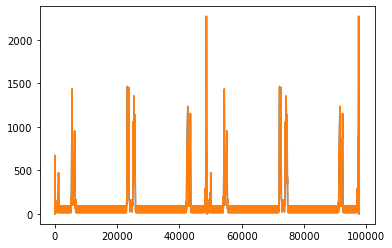

In [32]:
%matplotlib inline
from matplotlib.pyplot import plot, show
from xsequence.helpers.fcc_plots import fcc_axes

ax, = plot(df_mad['s'], df_mad['betx'])
ax, = plot(df_pyat['s'], df_pyat['betx'])
show()

A useful tool to debug changes and track differences between lattices. In this case the difference between an FCC-ee Higgs physics lattice from SAD and from MAD-X.


In [16]:
from xsequence.helpers.compare_lattices import compare_lattices
compare_lattices(lat_sad, lat_mad)

-- Comparing global

---- Checking lattice names

Different Lattice names

ring  <-->  l000013

---- Checking sequence lengths

Identical sequence lengths: 8708

-- Comparing elements

---- Checking element names

Element 'ring$start' is not in Lattice 2

Element 'ring$end' is not in Lattice 2

Element 'l000013$start' is not in Lattice 1

Element 'l000013$end' is not in Lattice 1

---- Checking element attributes

Element 'ca1.1' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.1' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.2' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.2' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.3' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.3' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.4' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.4' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.5' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.5' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.6' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.6' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.7' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.7' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.8' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.8' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.9' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.9' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.10' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.10' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca2.11' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.11' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.12' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.12' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.13' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.13' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.14' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.14' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.15' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.15' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.16' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.16' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.17' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.17' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.18' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.18' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.19' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.19' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.20' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.20' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'bsep.1' not equal between lattices

    Attribute '_rbend_e1' is not equal

-0.0002054794520547945  <-->  0.0

    Attribute 'e1' is not equal

0.0  <-->  0.0002054794520547945

Element 'ca1.21' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.21' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.22' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.22' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.23' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.23' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.24' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.24' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.25' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.25' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.26' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.26' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.27' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.27' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.28' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.28' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.29' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.29' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.30' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.30' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca2.31' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.31' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.32' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.32' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.33' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.33' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.34' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.34' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.35' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.35' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.36' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.36' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.37' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.37' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.38' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.38' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.39' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.39' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'ca2.40' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  260863

Element 'ca1.40' not equal between lattices

    Attribute 'energy' is not equal

0.0  <-->  120

    Attribute 'harmonic_number' is not equal

0.0  <-->  130431

Element 'bsep.2' not equal between lattices

    Attribute '_rbend_e1' is not equal

-0.0002054794520547945  <-->  0.0

    Attribute 'e1' is not equal

0.0  <-->  0.0002054794520547945

0

The lattice can be exported to cpymad, pyat and xline. 

In [17]:
madx = lat.to_cpymad()
pyat = lat.to_pyat()
line = lat.to_xline()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.09 15:07:49      +
  ++++++++++++++++++++++++++++++++++++++++++++


The 'xdeps' dependencies package from R. de Maria has been implemented into Lattices to import dependencies from cpymad. 

Dependency manager is contained in:
   - lat.manager

The references to the different objects are stored as:
   - lat.vref  --> Reference to variables
   - lat.sref  --> Reference to sequence
    

In [18]:
from cpymad.madx import Madx
cpymad_ins = Madx(stdout=False)
cpymad_ins.call("lhc.seq")
cpymad_ins.call("optics.madx")

lat = Lattice.from_cpymad(cpymad_ins, seq_name="lhcb1", 
  dependencies=True)

print(lat.sequence["mqxa.1r1"].k1)

0.00854562504357


In [19]:
lat.vref["kqx.r1"] = 0.01
print(lat.sequence["mqxa.1r1"].k1)

0.01


New knobs can be created to tune specific magnets. Here, a new knob called 'mqxa_knob' is created that adds a value to the strengths of all 'mqxa' elements.

 - element.k1 = current_expression + mqxa_knob

Note the that the syntax is still under development and will be polished to offer much more intuitive functionalities.

In [20]:
for el in lat.sequence.find_elements("mqxa*"):
    lat.sref[el].k1 = lat.manager.tasks[lat.sref[el].k1].expr + lat.vref["mqxa_knob"]

for name, el in lat.sequence.find_elements("mqxa*").items():
    print(el.k1)

0.01
0.01
0.009509815813
0.009509815813
-0.009509815813
-0.009509815813
-0.00854562504357
-0.00854562504357
0.00854562504357
0.00854562504357
0.009509815813
0.009509815813
-0.009509815813
-0.009509815813
-0.00854562504357
-0.00854562504357


The new expression for element 'mqxa.1l1' is now:

In [21]:
print(lat.manager.tasks[lat.sref["mqxa.1l1"].k1].expr)

((v['kqx.l1']+v['ktqx1.l1'])+v['mqxa_knob'])


A change of the knob value will result in the desired change of k1 strengths.

In [22]:
lat.vref["mqxa_knob"] = 0.015

for name, el in lat.sequence.find_elements("mqxa*").items():
    print(el.k1)

0.025
0.025
0.024509815812999998
0.024509815812999998
0.005490184186999999
0.005490184186999999
0.00645437495643
0.00645437495643
0.02354562504357
0.02354562504357
0.024509815812999998
0.024509815812999998
0.005490184186999999
0.005490184186999999
0.00645437495643
0.00645437495643
